## Rotation matrix

Multiplying a vector by a matrix is equivalent to apply a linear transformation to that vector. One common example, is the rotation matrix: ![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/678b1828be1c7064bc3f25cd1cb323f88f0d8acf)

where the theta is the angle by which the vector is rotated.

Could you create a function that:
    
- receive the angle as input argument and a vector as input
- plots both the original and the transformed vector on the same plot but with different colors

?

BONUS: https://matplotlib.org/stable/api/animation_api.html

Can you make an animation that shows the intermediate steps of the rotation and save into a gif?

Tip: don't contraint your imagination.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/chriswmann/datasets/master/500_Person_Gender_Height_Weight_Index.csv")

In [3]:
df.sort_values('Gender')

,Gender,Height,Weight,Index
164,Female,172,111,4
392,Female,183,76,2
210,Female,150,84,4
209,Female,148,67,4
393,Female,183,87,3
...,...,...,...,...
223,Male,178,140,5
221,Male,183,138,5
219,Male,159,109,5
235,Male,170,81,3


You have collected some data about 500 samples of people.

You have information about the weight, the height, the gender and the BMI of the person.

For the BMI:

- 0 means 'Extremely Weak'
- 1 means 'Weak'
- 2 means 'Normal'
- 3 means 'Overweight'
- 4 means 'Obesity'
- 5 means 'Extreme Obesity'

Before starting: *what does each row represent?*
    


In [4]:
bmi_men3 = np.logical_and(df['Gender']=='Male', df['Index']==3).sum()
bmi_women3 = np.logical_and(df['Gender']=='Female', df['Index']==3).sum()

print(bmi_men3)
print(bmi_women3)


32
36


- Can you make an overview about them? For example: how many women are overweight? How many men? Etc etc. 

- Can you plot the data such that on the x axis you have the weight, on the y axis you have the height, and the individuals of the same BMI (column index) get colored with the same color?

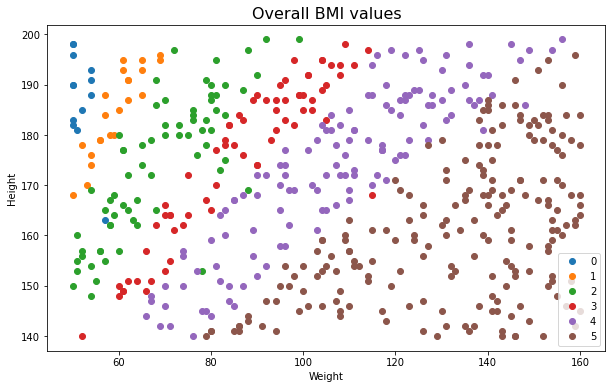

In [5]:
import matplotlib.pyplot as plt

# bmi_men3 = np.logical_and(df['Gender']=='Male', df['Index']==3).sum()
# bmi_women3 = np.logical_and(df['Gender']=='Female', df['Index']==3).sum()

df = df.sort_values('Gender')
bmi_women = df[:255]
bmi_men = df[255:]

bmi_men = bmi_men.sort_values('Index')
bmi_men3 = bmi_men[49:81]

bmi_women = bmi_women.sort_values('Index')
bmi_women3 = bmi_women[55:91]

# print(bmi_women)
# print(bmi_men)
plt.figure(figsize=(10,6))
index = df.groupby('Index')
for name, group in index:
    plt.plot(group.Weight, group.Height, marker='o', linestyle='', markersize=6, label=name)

plt.title('Overall BMI values', fontsize=16)
plt.ylabel('Height')
plt.xlabel('Weight')
plt.legend()
plt.savefig('C:/Users/Hari/Documents/AI-sep/AI_Module/14. Challenge Day/Overall BMI values.png')

Do the same but only for males:
    

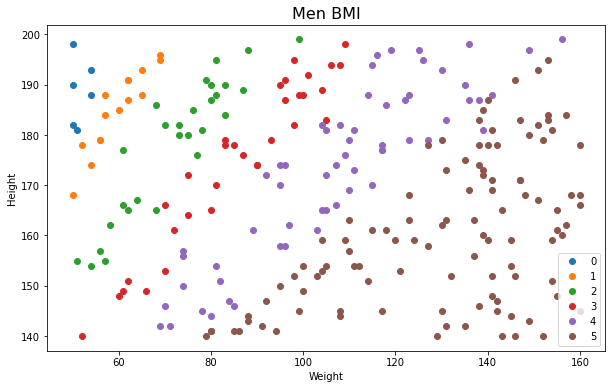

In [6]:
plt.figure(figsize=(10,6))

index = bmi_men.groupby('Index')
for name, group in index:
    plt.plot(group.Weight, group.Height, marker='o', linestyle='', markersize=6, label=name)


plt.ylabel('Height')
plt.xlabel('Weight')
plt.title('Men BMI', fontsize=16)
plt.legend()
plt.savefig('C:/Users/Hari/Documents/AI-sep/AI_Module/14. Challenge Day/Men BMI.png')

Repeat for females:

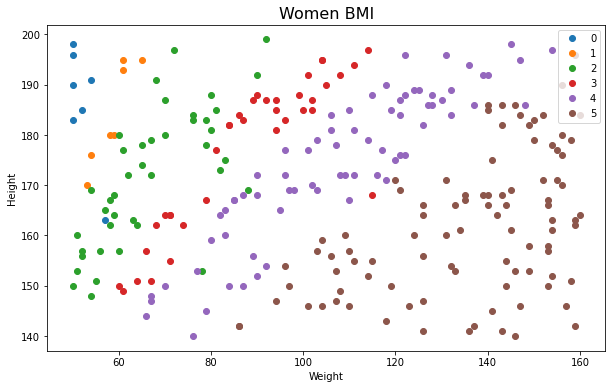

In [7]:
plt.figure(figsize=(10,6))

index = bmi_women.groupby('Index')
for name, group in index:
    plt.plot(group.Weight, group.Height, marker='o', linestyle='', markersize=6, label=name)


plt.ylabel('Height')
plt.xlabel('Weight')
plt.title('Women BMI', fontsize=16)
plt.legend()
plt.savefig('C:/Users/Hari/Documents/AI-sep/AI_Module/14. Challenge Day/Women BMI.png')

Can you plot the histograms of the height of males, females and the total dataset? 

Do the same for the weight.

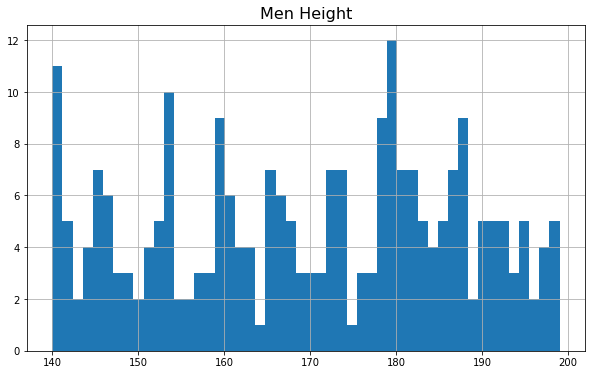

<Figure size 432x288 with 0 Axes>

In [8]:
height_men = np.array(bmi_men['Height'])
weight_men = np.array(bmi_men['Weight'])

plt.figure(figsize=(10,6))

plt.hist(height_men, bins=50)
plt.grid(True)
plt.title('Men Height', fontsize=16)
plt.show()
plt.savefig('C:/Users/Hari/Documents/AI-sep/AI_Module/14. Challenge Day/Men Height.png')

In [9]:
# Males height


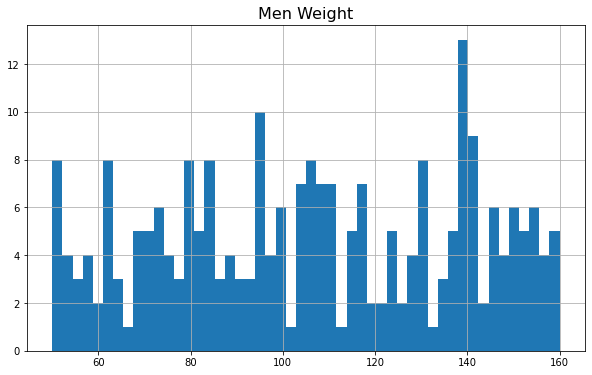

<Figure size 432x288 with 0 Axes>

In [10]:
# Males weight
height_men = np.array(bmi_men['Height'])
weight_men = np.array(bmi_men['Weight'])

plt.figure(figsize=(10,6))

plt.hist(weight_men, bins=50)
plt.grid(True)
plt.title('Men Weight', fontsize=16)
plt.show()
plt.savefig('C:/Users/Hari/Documents/AI-sep/AI_Module/14. Challenge Day/Men Weight.png')

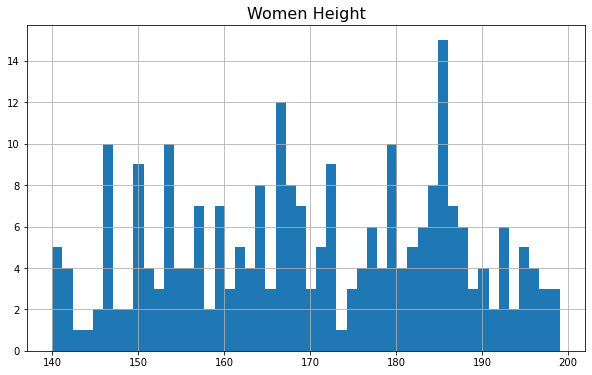

<Figure size 432x288 with 0 Axes>

In [11]:
# Females height
height_women = np.array(bmi_women['Height'])
weight_women = np.array(bmi_women['Weight'])

plt.figure(figsize=(10,6))

plt.hist(height_women, bins=50)
plt.grid(True)
plt.title('Women Height', fontsize=16)
plt.show()
plt.savefig('C:/Users/Hari/Documents/AI-sep/AI_Module/14. Challenge Day/Women Height.png')

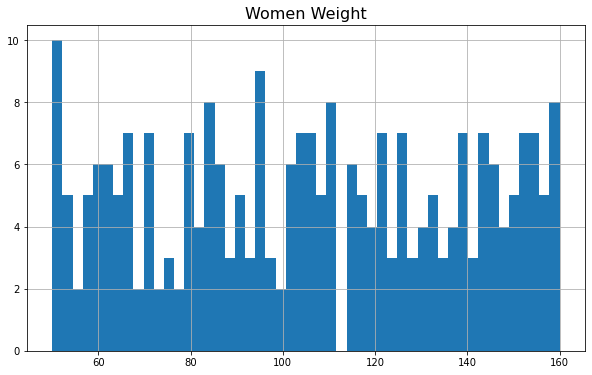

<Figure size 432x288 with 0 Axes>

In [12]:
height_women = np.array(bmi_women['Height'])
weight_women = np.array(bmi_women['Weight'])

plt.figure(figsize=(10,6))

plt.hist(weight_women, bins=50)
plt.grid(True)
plt.title('Women Weight', fontsize=16)
plt.show()
plt.savefig('C:/Users/Hari/Documents/AI-sep/AI_Module/14. Challenge Day/Women Weight.png')

## Euclidean Distance

In the above data, the mean of all the points is given by the sum of all the points divided by the number of them. Pandas, does it for us by doing:

In [13]:
mean_vector = [df.Weight.mean(), df.Height.mean()]
mean_vector

[106.0, 169.944]

- I know that is less efficient, but I want to see if you understand the concept of the mean of vectors: can you redo the process with a for loop?

- Plot the data again together with the mean value that must be visible in the middle, maybe with another size or marker and color

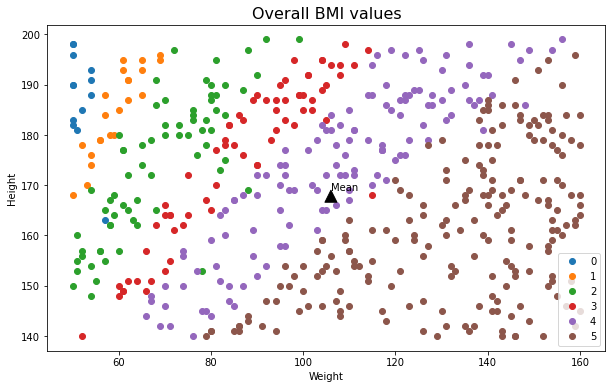

In [14]:
plt.figure(figsize=(10,6))
index = df.groupby('Index')
for name, group in index:
    plt.plot(group.Weight, group.Height, marker='o', linestyle='', markersize=6, label=name)

plt.title('Overall BMI values', fontsize=16)
plt.annotate('Mean',xy=(106, 169), xytext=(106, 169), arrowprops={'facecolor':'black'})
plt.ylabel('Height')
plt.xlabel('Weight')
plt.legend()
plt.savefig('C:/Users/Hari/Documents/AI-sep/AI_Module/14. Challenge Day/Overall BMI values.png')

It's not surprising that is perfectly in the middle, is it?

Now, compute the mean of the elements that have a specific BMI: for example, the mean of all the elements with index 1, then the mean of the elements of index 2... 

Plot the mean of the all points as above together with the means of the different groups, all with different colors. Don't plot the rest of the points, they would lead to confusion.

Don't forget to add the legend!

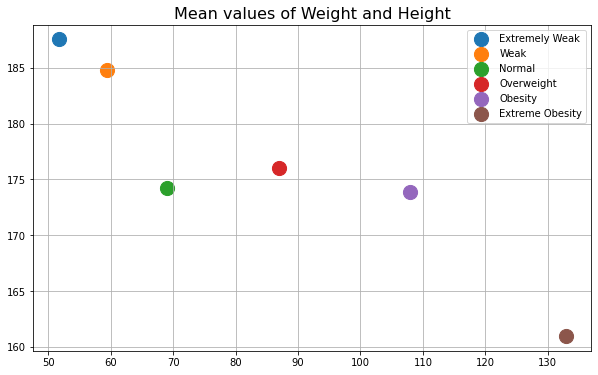

In [15]:
plt.figure(figsize=(10,6))
for i in range(6):
    var = df.loc[(df['Index'] == i)].mean()
    mean_vector = [var[0], var[1]]
    plt.scatter(x=var[1], y=var[0], s=200)
    # print(var)
labels=['Extremely Weak','Weak','Normal','Overweight','Obesity','Extreme Obesity']


plt.title('Mean values of Weight and Height', fontsize=16)
plt.grid(True)
plt.legend(labels)
plt.savefig('C:/Users/Hari/Documents/AI-sep/AI_Module/14. Challenge Day/Mean values of Weight and Height.png')

The differences look more evident now, right?

For each of the points on the plot, except for the "Mean" point, can you compute the euclidean distance from the mean vector? (Hey, I'm using point, vector, samples to refer to the same thing! This is because data points have multiple names, like Spanish people https://www.youtube.com/watch?v=z7qYTNp17ao ).

Remember, if you have two points $v = (v1, v2)$ and $w = (w1, w2)$, the euclidean distance is given by the formula:

$$||v-w|| = \sqrt{(v1-w1)^{2} + (v2-w2)^{2})}$$

or it looks like the norm of a difference in numpy... or the `euclidean` method of scipy... Up to you, as long as you get the result to your awesome boss.

# PCA

Install the `scikit-learn` library by running `conda install -c conda-forge scikit-learn` on your terminal or installing `scikit-learn` from your Anaconda Navigator.

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()

This library contains a dataset with hand written digits. Let's see some samples:

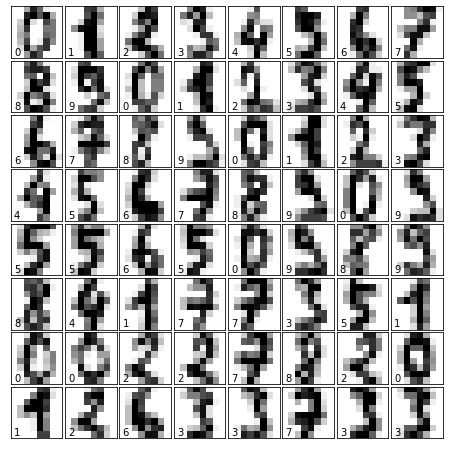

In [17]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

Don't worry about the code above, I just copy pasted it from the documentation. 

The images have a lot of dimensions (each pixel can be thought as a coordinate):

In [18]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [19]:
digits.images[0].shape

(8, 8)

precisely 8x8 dimensions (so 64 coordinates!). How can we plot a system of 64 coordinates? Well, it's pretty hard to do on a piece of a paper, even with a 3D representation. I can imagine some ways to represent 5D data, with a lot of creativity, but still...

So there's this technique, called PCA, that "project" the data into two main axes, so that you can look at them from a distance, so that they look as 2D points:

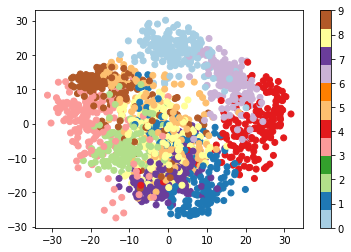

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired")
plt.colorbar()

here we go! It's still a little mess, isn't it? However, look at how the points related to 0 are close to the points related to 6! and the 1s to the 7s! Make sense, right? They look very similar when you draw them!

I want you to redo the same thing you did for BMI: let's put the projections in a dataframe:

In [21]:
digits_df = pd.DataFrame({"x":proj[:, 0], "y":proj[:, 1], "label":digits.target})


In [22]:
digits_df

,x,y,label
0,-1.259466,21.274883,0
1,7.957605,-20.768702,1
2,6.991926,-9.955983,2
3,-15.906105,3.332462,3
4,23.306863,4.269062,4
...,...,...,...
1792,-14.606631,13.344124,9
1793,6.464572,20.567300,0
1794,10.801287,-6.960252,8
1795,-4.872105,12.423956,9


Don't worry if I use `digits.target` for example, it's just something provided by the sklearn library and I'm taking advantage of it. In real life, it's not that easy for each dataset! However, what looks like magic now, will be easier in the ML module!

- Question: what does the column "label" represent?

### Exercise

- Group the dataframe by the labels, and compute the means w.r.t. the means and plot only them.
- Don't forget the legend!
- Hint: set `plt.xlim([-40,40]` so that the legend doesn't overlap


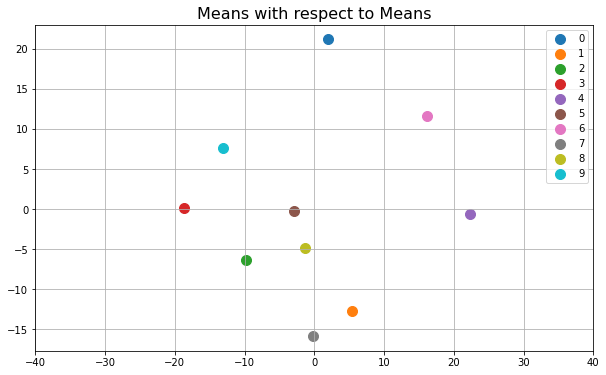

<Figure size 432x288 with 0 Axes>

In [23]:
digits_df.sort_values('label')
plt.figure(figsize=(10,6))
for i in range(10):
    var = digits_df.loc[(digits_df['label'] == i)].mean()
    mean_vector = [var[0], var[1]]
    plt.scatter(x=var[0], y=var[1], s=100)
    # print(var)
labels=['0','1','2','3','4','5', '6', '7', '8', '9']

plt.xlim([-40,40])
plt.legend(labels)
plt.grid(True)
plt.title('Means with respect to Means', fontsize=16)
plt.show()
plt.savefig('C:/Users/Hari/Documents/AI-sep/AI_Module/14. Challenge Day/Means with respect to Means.png')

## Finally: surprise me! What can you bring more than the other team? 


6
7


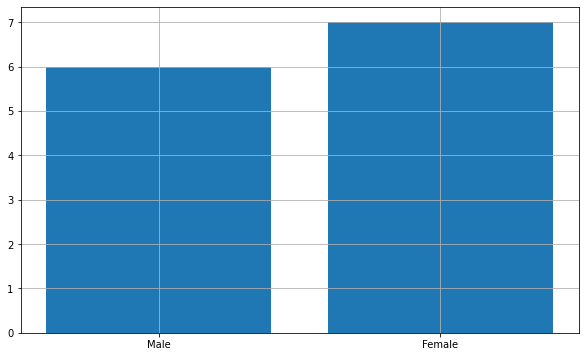

<Figure size 432x288 with 0 Axes>

In [24]:
#The no of Male and Females are in Extremely Weak group
bmi_men_0 = np.logical_and(df['Gender']=='Male', df['Index']==0).sum()
bmi_women_0 = np.logical_and(df['Gender']=='Female', df['Index']==0).sum()

print(bmi_men_0)
print(bmi_women_0)

# Importing the matplotlib library
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
gendr = ['Male', 'Female']
# Integer value interms of death counts
Extremely_Weak_Count= [6, 7]
plt.grid(True)
plt.bar(gendr,Extremely_Weak_Count)
plt.show()

plt.savefig('C:/Users/Hari/Documents/AI-sep/AI_Module/14. Challenge Day/ M_F:Extremely Weak group .png')

105
93


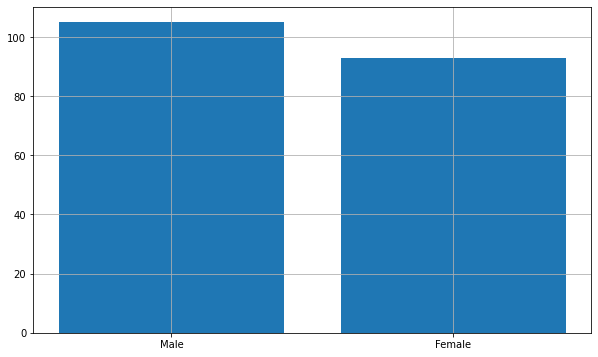

<Figure size 432x288 with 0 Axes>

In [25]:
#The no of Male and Females are in Extremely obisity group
bmi_men_5= np.logical_and(df['Gender']=='Male', df['Index']==5).sum()
bmi_women_5 = np.logical_and(df['Gender']=='Female', df['Index']==5).sum()

print(bmi_men_5)
print(bmi_women_5)

# Importing the matplotlib library
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
gendr = ['Male', 'Female']
Extremely_obisity_Count= [105, 93]
plt.grid(True)
plt.bar(gendr,Extremely_obisity_Count)
plt.show()

plt.savefig('C:/Users/Hari/Documents/AI-sep/AI_Module/14. Challenge Day/ M_F:Extremely obisity group .png')